# Topic 7
### Eun Ju Jong 
### CIS 397
### Dr. Hallenbeck

In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def movespines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

## Exercise 1 - The Newton-Raphson Optimizer
Newton-Raphson function to find the nearest minimum of a function:

In [154]:
#first derivative function
def cderiv(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

In [155]:
#second derivative function
def cderiv_sec(f, x, h):
    return (cderiv(f, x + h, h) - cderiv(f, x - h, h)) / (2*h)

In [156]:
def NR_optimizer(f, x0, epsilon):
    xi = x0
    h = 1e-6
    xi = xi - cderiv(f, xi, h) / cderiv_sec(f, xi, h)
    
    while abs(cderiv(f, xi, h)) >= epsilon:
        xi = xi - cderiv(f, xi, h) / cderiv_sec(f, xi, h)
        
    return xi

#### Testing on a function $f(x) = x^2 - 2^x$:

In [157]:
def func(x):
    return x**2 - 2**x

When estimating as $x0 = 0$:

In [158]:
NR_optimizer(func, 0, 1e-8)
print("The local minimum: " + str(NR_optimizer(func, 0, 1e-8)))

The local minimum: 0.4850896433604895


When estimating as $x0 = 2.5$:

In [159]:
NR_optimizer(func, 2.5, 1e-8)

3.2124325245354313

$\rightarrow$The Newton Raphson Optimizer is not generating the correct extrema of the function.

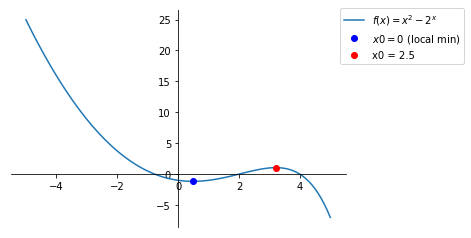

In [160]:
x = np.linspace(-5, 5, 100)

plt.plot(x, func(x), label = '$f(x)=x^2 - 2^x$')
plt.plot(NR_optimizer(func, 0, 1e-8), func(NR_optimizer(func, 0, 1e-8)), 'bo', label = "$x0 = 0$ (local min)")
plt.plot(NR_optimizer(func, 2.5, 1e-8), func(NR_optimizer(func, 2.5, 1e-8)), 'ro', label = "x0 = 2.5")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.03))
movespines()

plt.show()

#### Why does the Newton-Raphson Optimizer generate a different value for the nearest minimum? 

This might be because we are using derivative of a given function to determine whether the arbitrary value $x0$ is close zero with an error less than or equal to the epsilon. when estimating the arbitrary $x0$ to be a value which is too far away from the exact x minimum value of the function, there is a possibility that the Newton-Raphson optimizer will generate another point where the derivative of the point is zero if the function contains multiple local minimum or maximum points.
<br>
<br>
$\rightarrow$ One solution to fix this problem is to set the arbitrary $x0$ to be as close to the actual minimum x value that we are trying to estimate as possible by graphing the function and making the cloest estimate for the minimum.  

## Exercise 2 - Gradient Descent in 1-D
Let's implement the Gradient Descent.

In [161]:
def gradient_1D(f, x0, epsilon):
    xi = x0
    xj = x0
    #some small value representing the step size
    d = 0.01
    xi = xi - cderiv(f, xi, h = 1e-6) * d
    
    while abs(cderiv(f, xi, h = 1e-6)) >= epsilon:
        if f(xi) >= f(xj):
            d *= 0.5
        xj = xi
        xi = xi - cderiv(f, xi, h = 1e-6) * d
            
    return xi

#### Test the gradient descent on $f(x) = x^2 - 2^x$:

In [162]:
gradient_1D(func, 0, 1e-6)

0.48508888388865135

In [163]:
gradient_1D(func, 2.5, 1e-6)

0.48509038902327717

Using the One dimentional gradient optimizer, we are able to generate approximately accurate the local extreme for $f(x) = x^2 - 2^x$ even when the estimate $x0$ is set to be 2.5.
#### How large can you make x0 before the gradient fails? Why?

In [164]:
for i in np.arange(0, 5, 0.1):
    print("when x0 = " + str(i) + ", extremum = " + str(gradient_1D(func, i, 1e-6)))

when x0 = 0.0, extremum = 0.485088883889
when x0 = 0.1, extremum = 0.485088885352
when x0 = 0.2, extremum = 0.485088888651
when x0 = 0.3, extremum = 0.485088889736
when x0 = 0.4, extremum = 0.485088888627
when x0 = 0.5, extremum = 0.48509038473
when x0 = 0.6, extremum = 0.485090386454
when x0 = 0.7, extremum = 0.485090389204
when x0 = 0.8, extremum = 0.485090389997
when x0 = 0.9, extremum = 0.485090381971
when x0 = 1.0, extremum = 0.485090389917
when x0 = 1.1, extremum = 0.485090389926
when x0 = 1.2, extremum = 0.485090380802
when x0 = 1.3, extremum = 0.48509038788
when x0 = 1.4, extremum = 0.485090384743
when x0 = 1.5, extremum = 0.485090383852
when x0 = 1.6, extremum = 0.485090387061
when x0 = 1.7, extremum = 0.485090385804
when x0 = 1.8, extremum = 0.485090381263
when x0 = 1.9, extremum = 0.485090384435
when x0 = 2.0, extremum = 0.485090386259
when x0 = 2.1, extremum = 0.485090387625
when x0 = 2.2, extremum = 0.485090389457
when x0 = 2.3, extremum = 0.485090382758
when x0 = 2.4, ext

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


$\rightarrow$ As we can see, the extremum generated from the one dimentional gradient optimazer is approximately accurate until it fails at the point where the estimate of $x0$ becomes 3.2.
<br>
<br>
This is because the optimizer is coded in a way that it can only find minimum extremes regarding how a new $x0$ value is defined and how the reduction of delta is set up within the funciton. 
#### Is this a problem?
This can be a problem when a function has multiple extrema.
<br>
<br>
Since the gradient optimizer generates extremes with an implemetation of calculating the minimum values of a function only, we will not be able to get extreme maximum values unless we give an ansolutely precise value that approximately falls into the actual value of the extreme. 

#### Test the gradient descent on the function $f(x) = (sin(x) + 2)(x^2 + 1)$:

In [165]:
def func_2(x):
    return (np.sin(x) + 2) * ((x**2) + 1)

In [166]:
print("The local extreme: " + str(gradient_1D(func_2, 0, 1e-6)))

The local extreme: -0.307249210291


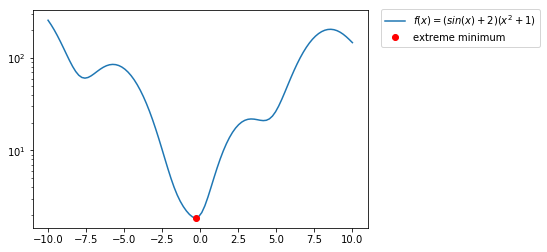

In [167]:
x = np.linspace(-10, 10, 100)

plt.semilogy(x, func_2(x), label = '$f(x)=(sin(x) + 2)(x^2 + 1)$')
plt.semilogy(gradient_1D(func_2, 0, 1e-6), func_2(gradient_1D(func_2, 0, 1e-5)), 'ro', label = 'extreme minimum')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.53, 1.03))
#movespines(bottom = False)

plt.show()

#### Are there choices of x0 where finding the minimum fails? Why?

In [168]:
for i in range(-10, 11):
    print("when x0 = " + str(i) + ", extremum = " + str(gradient_1D(func_2, i, 1e-4)))

when x0 = -10, extremum = -7.5818124139
when x0 = -9, extremum = -7.58181269506
when x0 = -8, extremum = -7.58181279144
when x0 = -7, extremum = -7.58180974413
when x0 = -6, extremum = -7.5818091121
when x0 = -5, extremum = -0.307288578943
when x0 = -4, extremum = -0.307287989942
when x0 = -3, extremum = -0.307288610549
when x0 = -2, extremum = -0.307288673496
when x0 = -1, extremum = -0.307288377867
when x0 = 0, extremum = -0.307211113854
when x0 = 1, extremum = -0.307211190693
when x0 = 2, extremum = -0.307210945057
when x0 = 3, extremum = -0.307211135691
when x0 = 4, extremum = 4.16518955858
when x0 = 5, extremum = 4.16521012436
when x0 = 6, extremum = 4.16521053202
when x0 = 7, extremum = 4.16521088631
when x0 = 8, extremum = 4.16521092287
when x0 = 9, extremum = 10.8077646916
when x0 = 10, extremum = 10.8077639767


$\rightarrow$ When the optimizer is given an estimate in a range of [-10, -6], it generates a local minimum of approximately -7.58. Also, when the optimizer is given an estimate in a range of [4, 8], it generates a local minimum of approximately 4.165. It is interesting to see that when the optimizer is given the estimate of 9 or 10, it generates the value of the local maximum.  
<br>
As I have mentioned earlier, the function of one dimetional gradient descent is defined to calculate minimum extremes. That is why if a function has multiple extrema, it will generate a local minimum within the range of precision as given the estimate of $x0$.

## Exercise 3 - Gradient Descent in Higher Dimensions
$\rightarrow$ To generalize the gradient function to higher dimensions, we will first need to define a gradient function.
<br>
$\rightarrow$ A gradient is a vector, with each element given as $(\overrightarrow{\bigtriangledown f})_i = \displaystyle\frac{\partial f}{\partial x_i}$
<br>
$\rightarrow$ This can be done by running a centered differencing derivative on the function multiple times, shifting only one of the entries in your x array each time.

In [169]:
#the gradient function to calculate the gradient of f at point (x, y)
def gradient(f, x, y, h=1e-6):
    gradient_x = (f(x + h, y) - f(x - h, y)) / (2*h)
    gradient_y = (f(x, y + h) - f(x, y - h)) / (2*h)
    
    return (gradient_x, gradient_y)

In [323]:
def gradient_2D(f, x0, y0, epsilon=1e-7, trace = False):
    xi = x0
    xj = x0
    yi = y0
    yj = y0
    #some small value representing the step size
    d = 0.1
    xi = xi - gradient(f, xi, yi, h = 1e-9)[0] * d
    yi = yi - gradient(f, xi, yi, h = 1e-9)[1] * d
    
    while np.sqrt(gradient(f, xi, yi, h = 1e-9)[0]**2 + gradient(f, xi, yi, h = 1e-9)[1]**2) >= epsilon:
        if f(xi, yi) >= f(xj, yj):
            d /= 1.5
            
        if(trace):
            print("x = %s, y = %s, z = %s" %(xi, yi, f(xi, yi)))
            print(gradient(f, xi, yi))
        xj = xi
        yj = yi
        xi = xi - gradient(f, xi, yi, h = 1e-9)[0] * d
        yi = yi - gradient(f, xi, yi, h = 1e-9)[1] * d
            
    return (xi, yi)

#### Testing the gradient function on the function $f(\overrightarrow{x}) = 0.5\cdot x^2 + 0.5\cdot y^2$:

In [324]:
def func_3(x, y):
    return 0.5*(x**2) + 0.5*(y**2)

In [325]:
#printing the cordinates x, and y of the gradient at <i, i>
for i in range(0, 10):
    a = gradient(func_3, i, i, 1e-7)
    print("x cordinate = " + str(a[0]) + ", y cordinate = " + str(a[1]))

x cordinate = 0.0, y cordinate = 0.0
x cordinate = 1.0000000005838672, y cordinate = 1.0000000005838672
x cordinate = 1.9999999967268423, y cordinate = 1.9999999967268423
x cordinate = 2.9999999906493713, y cordinate = 2.9999999906493713
x cordinate = 3.9999999934536845, y cordinate = 3.9999999934536845
x cordinate = 5.00000002290335, y cordinate = 5.00000002290335
x cordinate = 5.999999999062311, y cordinate = 5.999999999062311
x cordinate = 7.000000046275545, y cordinate = 7.000000046275545
x cordinate = 8.000000022434506, y cordinate = 8.000000022434506
x cordinate = 8.99999996306633, y cordinate = 8.99999996306633


In [326]:
#printing the cordinates x, y of the minimum at <i, i>
for i in range(0, 10):
    a = gradient(func_3, i, i, 1e-7)
    print("x cordinate = " + str(a[0]) + ", y cordinate = " + str(a[1]))

x cordinate = 0.0, y cordinate = 0.0
x cordinate = 1.0000000005838672, y cordinate = 1.0000000005838672
x cordinate = 1.9999999967268423, y cordinate = 1.9999999967268423
x cordinate = 2.9999999906493713, y cordinate = 2.9999999906493713
x cordinate = 3.9999999934536845, y cordinate = 3.9999999934536845
x cordinate = 5.00000002290335, y cordinate = 5.00000002290335
x cordinate = 5.999999999062311, y cordinate = 5.999999999062311
x cordinate = 7.000000046275545, y cordinate = 7.000000046275545
x cordinate = 8.000000022434506, y cordinate = 8.000000022434506
x cordinate = 8.99999996306633, y cordinate = 8.99999996306633


$\rightarrow$ As we can see from the results above, the higher dimensional gradient descent function generates minimum values which are approximately close to the actual minimum of $f(x)$, which is at $<0, 0>$.

#### Testing the gradient function on the function $f(\overrightarrow{x}) = \displaystyle\frac{1}{10}(x^2 + y^2) + \frac{1}{2}x - y + \frac{1}{10}(x\cdot y) + 3$:
$\rightarrow$ This one has a minimum near $<-\displaystyle\frac{20}{3}, \frac{25}{3}>.$

In [327]:
def func_4(x, y):
    return 0.1*(x**2 + y**2) + 0.5*x - y + 0.1*x*y + 3

In [328]:
#printing the cordinates x, and y of the gradient at <i, i>
for i in range(0, 10):
    a = gradient(func_4, i, i, 1e-7)
    print("x cordinate = " + str(a[0]) + ", y cordinate = " + str(a[1]))

x cordinate = 0.49999999918171056, y cordinate = -1.0000000005838672
x cordinate = 0.7999999995789153, y cordinate = -0.6999999979662164
x cordinate = 1.09999999997612, y cordinate = -0.3999999975690116
x cordinate = 1.3999999959324327, y cordinate = -0.0999999993922529
x cordinate = 1.6999999985500835, y cordinate = 0.1999999943436137
x cordinate = 2.0000000144904106, y cordinate = 0.4999999969612645
x cordinate = 2.300000003785385, y cordinate = 0.7999999951380232
x cordinate = 2.6000000197257123, y cordinate = 1.1000000021965661
x cordinate = 2.900000026784255, y cordinate = 1.400000009255109
x cordinate = 3.1999999983156613, y cordinate = 1.6999999807865152


In [329]:
#printing the cordinates x, y of the minimum at <i, i>
for i in range(-5, 10):
    a = gradient_2D(func_4, i, i, 1e-3)
    print("x cordinate = " + str(a[0]) + ", y cordinate = " + str(a[1]))

x cordinate = -6.659629822459152, y cordinate = 8.326332248819739
x cordinate = -6.6596370439335715, y cordinate = 8.326338760804134
x cordinate = -6.6595727004318235, y cordinate = 8.326275772827188
x cordinate = -6.659579899701782, y cordinate = 8.326282184891511
x cordinate = -6.659587554163181, y cordinate = 8.32628972938332
x cordinate = -6.659594120606016, y cordinate = 8.32629694080822
x cordinate = -6.659601131138061, y cordinate = 8.326303441690385
x cordinate = -6.659608496941473, y cordinate = 8.32631081964874
x cordinate = -6.659615873847116, y cordinate = 8.326317853437956
x cordinate = -6.659622973197003, y cordinate = 8.326325286907462
x cordinate = -6.659629850502284, y cordinate = 8.32633143251826
x cordinate = -6.659637205203467, y cordinate = 8.326339154645751
x cordinate = -6.659644282348893, y cordinate = 8.326346443786264
x cordinate = -6.6596519257080615, y cordinate = 8.326353188917494
x cordinate = -6.6595884370780425, y cordinate = 8.326290145429397


In [330]:
print("minimum of the function: " + str(gradient_2D(func_4, 0, 5, 1e-6)))
print("Gradient at the point: " + str(gradient(func_4, 0, 5, 1e-6)))

minimum of the function: (-6.666653740161621, 8.333320774956405)
Gradient at the point: (1.000000000139778, 0.0)


$\rightarrow$ The minimum values of the vector function func_4 calculated from the higher dimensional gradient descent function is approximately cloes to the actual minimum, which is at $<0, 5>$

## Exercise 4 - Chi-Square Optimization
The $χ2$ function measures how good a fit is. To define it, we'll need:
<br>
* The actual data points: $(x_i, y_i)$
* A function which we're trying to use to fit those points: $f(x; a, b)$
<br>
<br>
$\rightarrow$ The function has multiple parameters, a and b (and c and so on), which can be varied. For a line, the parameters are m (the slope) and b (the intercept).

In [235]:
# A simple line function
def line(x, m, b):
    return b + m*x

# Produces randomly generated line data, 
# with m = -0.2 and b = 1, and some scatter.
# Call as x,y = linedata()
def linedata():
	x = np.linspace(0, 10, 20)
	np.random.seed(100)
	y = line(x, -0.2, 1)
	y = y + 0.2 * np.random.normal(size=len(x))

	return (x, y)

# A simple exponential decay
def expdecay(x, A, B):
    return A * np.exp(-B * x)

# Produces randomly generated exponential decay data,
# with A = 2.1 and B = 1.4, and some noise.
# Call as x,y = expdata()
def expdata():
	x = np.linspace(0, 4, 50)
	np.random.seed(100)
	y = expdecay(x, 2.1, 1.4)
	y_noise = 0.2 * np.random.normal(size=len(x))
	y = y + y_noise

	return (x, y)

In [312]:
def chi_optimizer(f, x, y):
    #minimizing the error of a, b since x, y are fixed
    def chi_square(a, b):
        diff_sum = 0
        for i in range(0, len(x)):
            err = y[i] - f(x[i], a, b)
            diff_sum = diff_sum + (err)**2
            
        return diff_sum
    
    return chi_square

#### Plot the data, along with your best-fit curves for the line function:

In [331]:
#a modified version of the higer dimensional gradient descent
#reduced h and epsilon values, smaller descrease in step size
def grad_h(f, x0, y0, epsilon=1e-3, trace = False):
    xi = x0
    xj = x0
    yi = y0
    yj = y0
    #some small value representing the step size
    d = 0.1
    xi = xi - gradient(f, xi, yi, h = 1e-4)[0] * d
    yi = yi - gradient(f, xi, yi, h = 1e-4)[1] * d
    
    while np.sqrt(gradient(f, xi, yi, h = 1e-4)[0]**2 + gradient(f, xi, yi, h = 1e-4)[1]**2) > epsilon:
        if f(xi, yi) >= f(xj, yj):
            d = d/2
            
        if(trace):
            print("x = %s, y = %s, z = %s" %(xi, yi, f(xi, yi)))
            print(gradient(f, xi, yi))
        xj = xi
        yj = yi
        xi = xi - gradient(f, xi, yi, h = 1e-4)[0] * d
        yi = yi - gradient(f, xi, yi, h = 1e-4)[1] * d
            
    return (xi, yi)

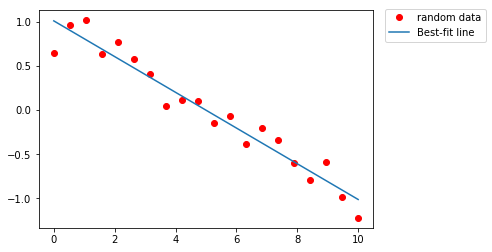

In [332]:
x = linedata()[0]
y = linedata()[1]
plt.plot(x, y, 'ro', label = 'random data')
#chiSquare returning a chi_square function
chiSquare = chi_optimizer(line, x, y)
a = grad_h(chiSquare, 5, 5)[0]
b = grad_h(chiSquare, 5, 5)[1]

line_x = np.linspace(0, 10, 20)
line_y = line(line_x, a, b)

plt.plot(line_x, line_y, label = 'Best-fit line')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.35, 1.03))

plt.show()

#### Plot the data, along with your best-fit curves for the exponential decay:

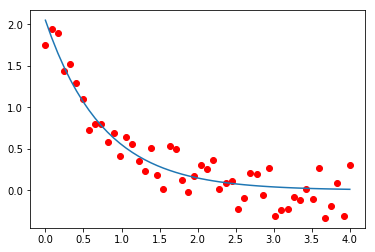

In [333]:
x, y = expdata()
#chiSquare returning a chi_square function
chiSquare = chi_optimizer(expdecay, x, y)
a, b = grad_h(chiSquare, 8, 8)

exp_x = np.linspace(0, 4, 50)
exp_y = expdecay(exp_x, a, b)

plt.plot(x, y, 'ro', label = 'random data')
plt.plot(exp_x, exp_y, label = 'best-fit line')

plt.show()